In [6]:
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import pandas as pd
import numpy as np
import pickle
K.set_image_data_format('channels_first')
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt

In [7]:
data = pd.read_csv('train_final.csv', index_col=False).dropna()
labels = data[['784']]

In [8]:
data.drop(data.columns[[784]], axis=1, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,35,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,244,219,219,219,219,219,219,219,219,219,219,219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,177,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, shuffle=True)

In [10]:
y_train=np.array(y_train)

In [11]:
y_train_labels = to_categorical(y_train, num_classes=13)
y_test_labels = to_categorical(y_test, num_classes=13)

In [12]:
train_data = []
for i in range(X_train.shape[0]):
    train_data.append(np.array(X_train[i:i+1]).reshape(1,28,28))

In [13]:
test_data = []
for i in range(X_test.shape[0]):
    test_data.append(np.array(X_test[i:i+1]).reshape(1,28,28))

In [14]:
np.random.seed(10)

In [15]:
model = Sequential()
model.add(Conv2D(30, (3, 3), input_shape=(1 , 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(13, activation='softmax'))


In [16]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 26, 26)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 13, 13)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 11, 11)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               48128     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [18]:
history = model.fit(np.array(train_data), y_train_labels, epochs=10, batch_size=32, shuffle=True, validation_data=(np.array(test_data), y_test_labels), verbose=1)


Epoch 1/10
883/883 [==============================] - 4s 4ms/step - loss: 0.8326 - accuracy: 0.7676 - val_loss: 0.1910 - val_accuracy: 0.9432
Epoch 2/10
883/883 [==============================] - 3s 3ms/step - loss: 0.2111 - accuracy: 0.9385 - val_loss: 0.1143 - val_accuracy: 0.9677
Epoch 3/10
883/883 [==============================] - 3s 3ms/step - loss: 0.1388 - accuracy: 0.9601 - val_loss: 0.0810 - val_accuracy: 0.9775
Epoch 4/10
883/883 [==============================] - 3s 3ms/step - loss: 0.1043 - accuracy: 0.9703 - val_loss: 0.0750 - val_accuracy: 0.9779
Epoch 5/10
883/883 [==============================] - 3s 3ms/step - loss: 0.0821 - accuracy: 0.9752 - val_loss: 0.0600 - val_accuracy: 0.9840
Epoch 6/10
883/883 [==============================] - 3s 3ms/step - loss: 0.0729 - accuracy: 0.9786 - val_loss: 0.0571 - val_accuracy: 0.9850
Epoch 7/10
883/883 [==============================] - 3s 3ms/step - loss: 0.0700 - accuracy: 0.9807 - val_loss: 0.0590 - val_accuracy: 0.9856
Epoch 

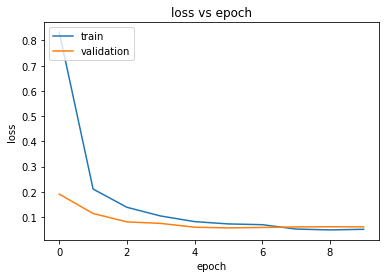

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

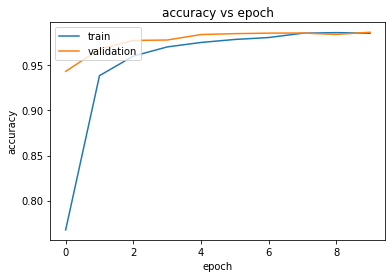

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [21]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")